In [77]:
import pandas as pd 
import json 


In [78]:
import json

metric_dict = {}
with open('avg-error.json', 'r') as f:
    AE = json.load(f)
    for experiment, d in AE.items():
        for run, AEs in d.items():
            metric = sum(AEs.values()) / len(AEs.values())
            d=  metric_dict.get(f"{experiment}_{run}", {})
            d.update({'AE': metric})
            metric_dict[f"{experiment}_{run}"] = d

with open("mAP.json", 'r') as f:
    mAP = json.load(f)
    for experiment, d in mAP.items():
        for run, mAP in d.items():
            d = metric_dict.get(f"{experiment}_{run}", {})
            d.update({'mAP': mAP})
            metric_dict[f"{experiment}_{run}"] = d

with open("avg-error_visible_only.json") as f:
    AE_visible_only = json.load(f)
    for experiment, d in AE_visible_only.items():
        for run, AEs in d.items():
            metric = sum(AEs.values()) / len(AEs.values())
            d=  metric_dict.get(f"{experiment}_{run}", {})
            d.update({'AE_visible_only': metric})
            metric_dict[f"{experiment}_{run}"] = d

In [79]:
runs = metric_dict.keys()
metrics = metric_dict.values()
AEs = [v['AE'] for v in metrics]
mAPs = [v['mAP'] for v in metrics]
AEs_visible_only = [v['AE_visible_only'] for v in metrics]

df = pd.DataFrame({'run': runs, 'AE': AEs, 'mAP': mAPs, 'AE_visible_only': AEs_visible_only})
df

,run,AE,mAP,AE_visible_only
0,real_dsd,19.440649,0.371196,16.129135
1,real_kpam,71.615815,0.195904,56.541755
2,large-run_ControlNetFromDepthRenderer_ccs=1.5,15.372556,0.513565,13.741707
3,large-run-2-stage_2stage:crop=Cropped:ControlN...,14.434121,0.535602,11.760837
4,model-comparison-1-stage_ControlNetFromDepthRe...,16.240892,0.490230,13.318858
5,model-comparison-1-stage_ControlNetTXTFromDept...,16.935339,0.462420,14.997541
6,model-comparison-1-stage_SD2FromDepthRenderer,16.615662,0.473222,14.585008
7,model-comparison-1-stage_SD2InpaintingRenderer,103.312096,0.184776,92.532054
8,model-comparison-1-stage_SD15RealisticCheckpoi...,17.111327,0.463795,13.578026
9,model-comparison-1-stage_SD15RealisticCheckpoi...,15.350752,0.500843,13.106432


In [80]:
df.to_csv('metrics.csv', index=False)

In [81]:
# get correlation of AE and mAP
correlation = df["mAP"].corr(df["AE"])
print(correlation)
correlation = df["mAP"].corr(df["AE_visible_only"])
print(correlation)

-0.9230945989026715
-0.9073544372018943


3.406408676705798


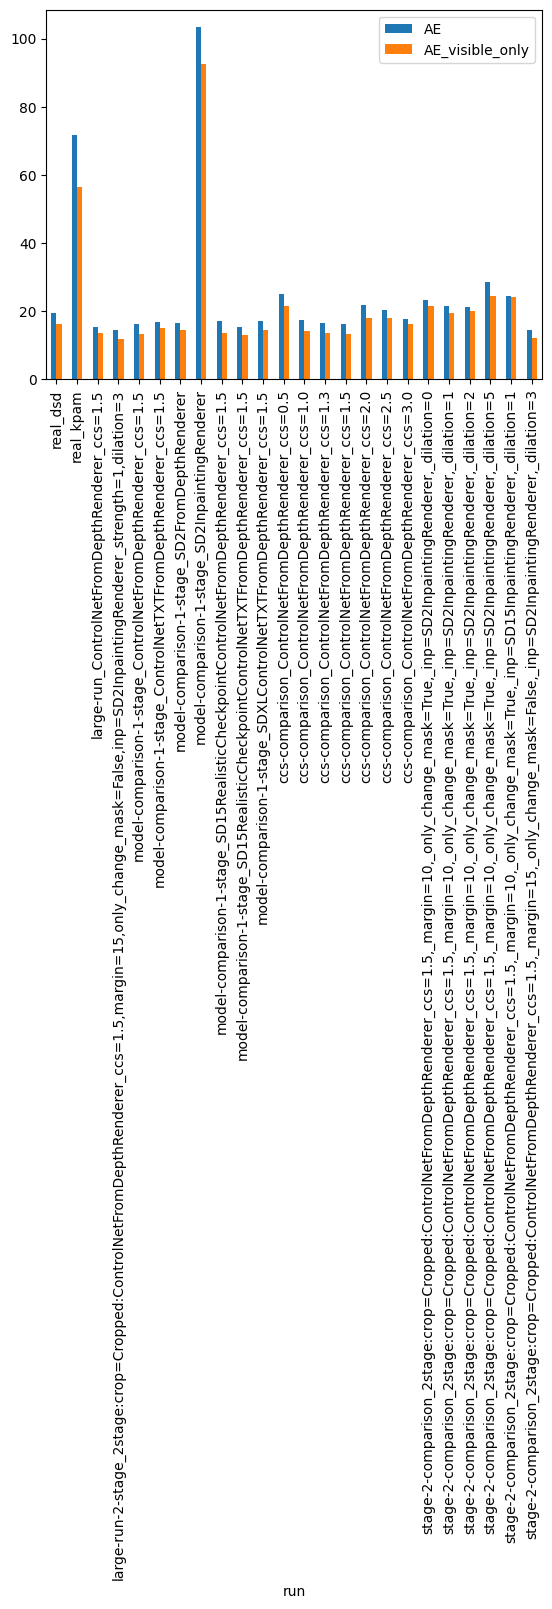

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot a bar chart of AE and visible only AE on the y axis and the run on the x axis
df.plot(x="run", y=["AE", "AE_visible_only"], kind="bar")
# print the average difference between the two
print(df["AE"].mean() - df["AE_visible_only"].mean())

Text(0.5, 1.0, 'mAP vs AE for all experiments')

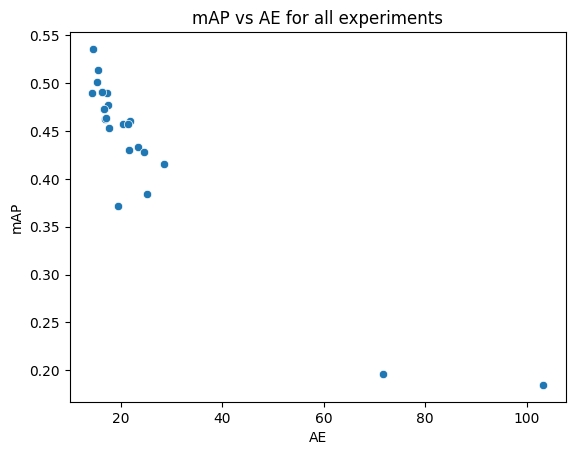

In [83]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x='AE', y='mAP')
plt.title("mAP vs AE for all experiments")

In [84]:
# filter on a main result runs
# real or large
df_filtered = df[df['run'].str.contains("real") | df['run'].str.contains("large")]
df_filtered

,run,AE,mAP,AE_visible_only
0,real_dsd,19.440649,0.371196,16.129135
1,real_kpam,71.615815,0.195904,56.541755
2,large-run_ControlNetFromDepthRenderer_ccs=1.5,15.372556,0.513565,13.741707
3,large-run-2-stage_2stage:crop=Cropped:ControlN...,14.434121,0.535602,11.760837


In [85]:
# filter on 'ccs' runs 
df_filtered = df[df['run'].str.contains("stage-2")].sort_values(by='run')
df_filtered['run'] = df_filtered['run'].str.replace('stage-2-comparison', '')
# map *100
df_filtered['mAP'] = df_filtered['mAP'] * 100
# round all metrics to 2 decimal places
df_filtered = df_filtered.round(2)
# show "run" and "map" columns
for i, row in df_filtered.iterrows():
    print(row['run'], row['mAP'],row['AE'])

_2stage:crop=Cropped:ControlNetFromDepthRenderer_ccs=1.5,_margin=10,_only_change_mask=True,_inp=SD15InpaintingRenderer,_dilation=1 42.85 24.45
_2stage:crop=Cropped:ControlNetFromDepthRenderer_ccs=1.5,_margin=10,_only_change_mask=True,_inp=SD2InpaintingRenderer,_dilation=0 43.28 23.35
_2stage:crop=Cropped:ControlNetFromDepthRenderer_ccs=1.5,_margin=10,_only_change_mask=True,_inp=SD2InpaintingRenderer,_dilation=1 43.06 21.47
_2stage:crop=Cropped:ControlNetFromDepthRenderer_ccs=1.5,_margin=10,_only_change_mask=True,_inp=SD2InpaintingRenderer,_dilation=2 45.7 21.35
_2stage:crop=Cropped:ControlNetFromDepthRenderer_ccs=1.5,_margin=10,_only_change_mask=True,_inp=SD2InpaintingRenderer,_dilation=5 41.51 28.48
_2stage:crop=Cropped:ControlNetFromDepthRenderer_ccs=1.5,_margin=15,_only_change_mask=False,_inp=SD2InpaintingRenderer,_dilation=3 48.98 14.36


<Axes: ylabel='run'>

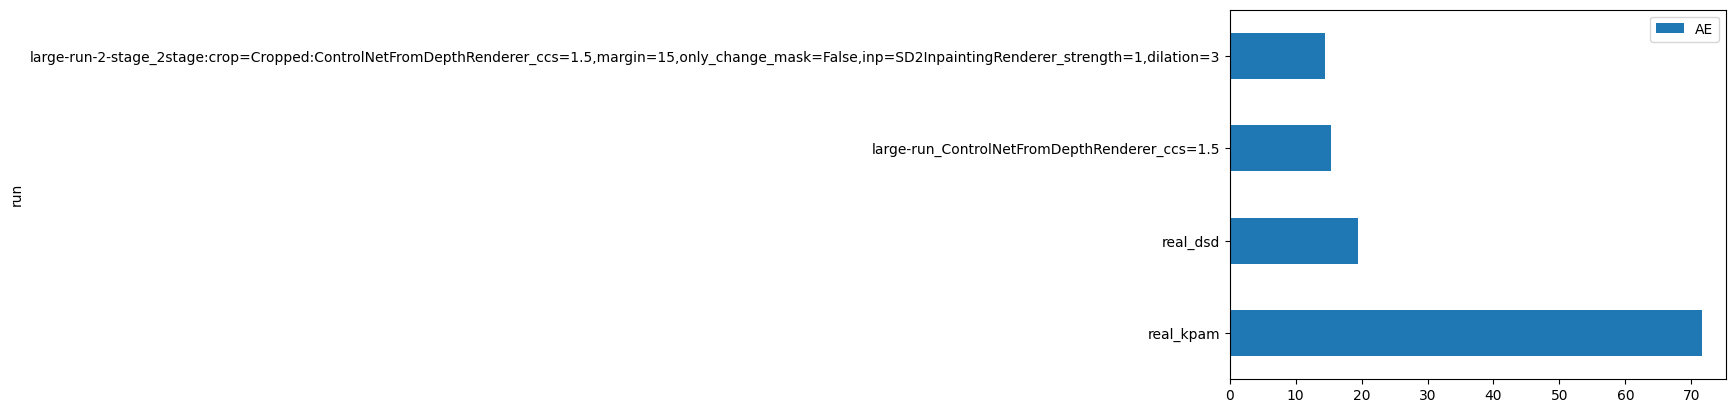

In [94]:
# filter the dataset to contain all runs with 'real' or 'large'
df_filtered = df[df['run'].str.contains("real") | df['run'].str.contains("large")]

# order them to descreasing AE
df_filtered = df_filtered.sort_values(by='AE', ascending=False)

# plot the AE barplot and add the AE scores on the bars
# use horizontal bars

df_filtered.plot(x="run", y="AE", kind="barh")
